# 1. Add All Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from scipy.sparse import csr_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.preprocessing import OneHotEncoder

# 2. ADD csv Files

In [2]:
df = pd.read_csv('Train.csv')
test = pd.read_csv('testupdate.csv')
df


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1
...,...,...,...,...,...
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0


In [5]:
df[df['AUTHOR']== 'crestpee'] 

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
22,z121znjjloycwtjf2233dfo5esfggn3lj,crestpee,2014-01-20T13:03:12,"now its 1,884,034,783 views! pls. comment the ...",0


In [6]:
# length of comments

In [7]:
lens = df['CONTENT'].str.len()
lens.mean(), lens.std(), lens.max()

(94.25324114088158, 129.5295747192226, 1200)

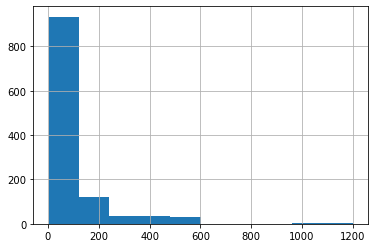

In [8]:
lens.hist();

# 3. Extracting Day info

In [9]:
df['DATE']=df['DATE'].astype('datetime64')

In [10]:
df['Day'] = df['DATE'].dt.day_name()

In [11]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Day
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,Thursday
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,Saturday
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,Sunday
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27 21:39:24,Subscribe to my channel ﻿,1,Wednesday
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28 16:30:13,and u should.d check my channel and tell me wh...,1,Thursday


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Day'),
 Text(0.5, 1.0, 'Day wise total count of comments')]

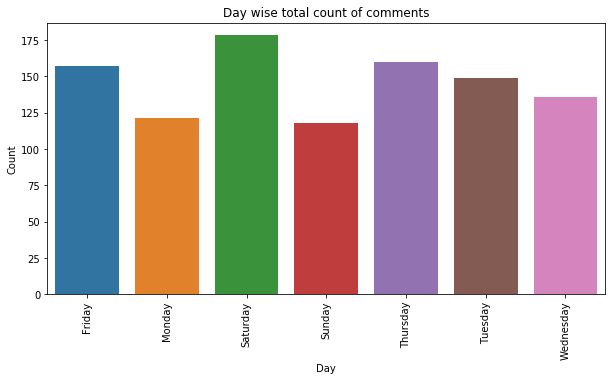

In [12]:
temp = df.groupby('Day').count()

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=temp.index, y='CONTENT', data=temp,ci=None)
ax.set(title = 'Day wise total count of comments',xlabel='Day', ylabel='Count')

# 3. Extracting Day info

In [13]:
df['hour'] = df['DATE'].dt.hour

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Hour'),
 Text(0.5, 1.0, 'Hour wise total count of comments')]

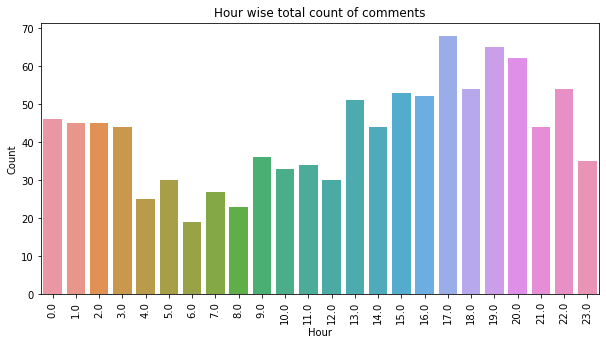

In [14]:
temp = df.groupby('hour').count()

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.barplot(x=temp.index, y='CONTENT', data=temp,ci=None)
ax.set(title = 'Hour wise total count of comments',xlabel='Hour', ylabel='Count')

# Class Count

In [15]:
temp = df.groupby('CLASS').count()
print(temp)

       COMMENT_ID  AUTHOR  DATE  CONTENT  Day  hour
CLASS                                              
0             571     571   571      571  571   571
1             586     586   448      586  448   448


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Class wise count')]

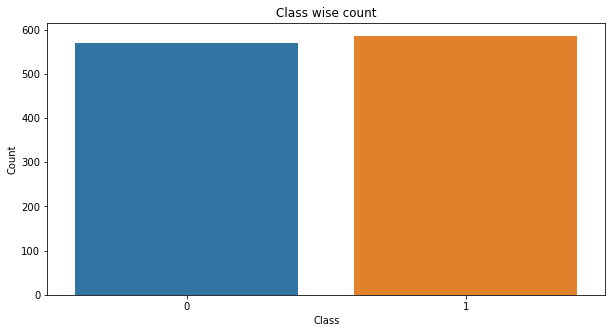

In [16]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=temp.index, y='CONTENT', data=temp,ci=None)
ax.set(title = 'Class wise count',xlabel='Class', ylabel='Count')

In [17]:
df['AUTHOR'].nunique()

1094

In [18]:
temp = df.groupby('AUTHOR')['COMMENT_ID'].count()

In [19]:
temp = pd.DataFrame(temp,index=None)
temp.rename(columns = {'COMMENT_ID':'Frequency'},inplace=True)
temp.sort_values(['Frequency'],ascending=0,inplace=True)
temp.head(20)

,Frequency
AUTHOR,
M.E.S,5
Shadrach Grentz,5
5000palo,4
DanteBTV,4
Hidden Love,4
Louis Bryant,4
Derek Moya,3
ThirdDegr3e,3
Jacob Johnson,3


# 4. Apply Pre-processing

### 1. Convert all text lower
### 2. Removing Punctuation
### 3. Remove Stop words

In [20]:
df["CONTENT"] = df["CONTENT"].str.lower()

In [21]:
import re
# result = re.sub(r’\d+’, ‘’, input_str)
# print(result)

df['CONTENT'] = df['CONTENT'].apply(lambda row : re.sub(r'\d+', '', row))

In [22]:
# import re

# # text = u'This is a smiley face \U0001f602'
# text = 'This is a smiley face 😂'
# print(text) # with emoji

# def deEmojify(text):
#     regrex_pattern = re.compile(pattern = "["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags = re.UNICODE)
#     return regrex_pattern.sub(r'',text)

# print(deEmojify(text))

In [23]:
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_p(test_str):
    for ele in test_str:  
        if ele in punc:  
            test_str = test_str.replace(ele, "")
    return test_str

In [24]:
import string

df['CONTENT'] = df['CONTENT'].apply(lambda row : remove_p(row))


In [25]:
df['CONTENT'] = df['CONTENT'].apply(lambda row : row.strip())

In [26]:
def remove_stopwords(input_str):
    tokens = word_tokenize(input_str)
    result = [str(i) for i in tokens if not i in stop_words]
    return result

In [27]:
df['CONTENT'] = df['CONTENT'].apply(lambda row : remove_stopwords(row))

In [28]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Day,hour
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48.000,"[huh, anyway, check, youtube, channel, kobyoshi]",1,Thursday,6.0
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43.000,"[shaking, sexy, ass, channel, enjoy, ﻿]",1,Saturday,8.0
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38.000,"[watchv=vtarggvgtwq, check, ﻿]",1,Sunday,16.0
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27 21:39:24.000,"[subscribe, channel, ﻿]",1,Wednesday,21.0
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28 16:30:13.000,"[u, shouldd, check, channel, tell, next﻿]",1,Thursday,16.0
...,...,...,...,...,...,...,...
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13 20:47:40.793,"[check, new, mixtape, check, new, mixtape, che...",1,Saturday,20.0
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13 20:17:25.181,"[waka, waka, rules]",0,Saturday,20.0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13 13:14:30.021,"[love, song, two, reasons, africa, born, beaut...",0,Saturday,13.0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13 12:09:31.188,[wow],0,Saturday,12.0


### 4. Apply Lematization

In [29]:

def lemmatize(input_list):
    temp_list = []
    lemmatizer=WordNetLemmatizer()
    for word in input_list:
        temp_list.append(lemmatizer.lemmatize(word))
    return(temp_list)

In [30]:
df['CONTENT'] = df['CONTENT'].apply(lambda row : lemmatize(row))

In [31]:
df['CONTENT'] = df['CONTENT'].apply(lambda row : ' '.join(row))

In [32]:
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Day,hour
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07 06:20:48.000,huh anyway check youtube channel kobyoshi,1,Thursday,6.0
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09 08:28:43.000,shaking sexy as channel enjoy ﻿,1,Saturday,8.0
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10 16:05:38.000,watchv=vtarggvgtwq check ﻿,1,Sunday,16.0
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27 21:39:24.000,subscribe channel ﻿,1,Wednesday,21.0
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28 16:30:13.000,u shouldd check channel tell next﻿,1,Thursday,16.0
...,...,...,...,...,...,...,...
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13 20:47:40.793,check new mixtape check new mixtape check new ...,1,Saturday,20.0
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13 20:17:25.181,waka waka rule,0,Saturday,20.0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13 13:14:30.021,love song two reason africa born beautiful sou...,0,Saturday,13.0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13 12:09:31.188,wow,0,Saturday,12.0


In [33]:
df[df['AUTHOR']== 'crestpee'] 

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,Day,hour
22,z121znjjloycwtjf2233dfo5esfggn3lj,crestpee,2014-01-20 13:03:12,view pls comment view count next hour p﻿,0,Monday,13.0


In [62]:
df.dropna(axis=0,inplace=True)

In [63]:
df.isnull().sum()

COMMENT_ID    0
AUTHOR        0
DATE          0
CONTENT       0
CLASS         0
Day           0
hour          0
dtype: int64

In [67]:
one_hot_day = pd.get_dummies(df['Day'])
# Drop column B as it is now encoded
# df = df.drop('B',axis = 1)

In [68]:
one_hot_day

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
1152,0,0,1,0,0,0,0
1153,0,0,1,0,0,0,0
1154,0,0,1,0,0,0,0
1155,0,0,1,0,0,0,0


In [71]:
one_hot_day = np.array(one_hot_day)

In [72]:
one_hot_day

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [74]:
data = df[['CONTENT','CLASS']] 

In [75]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [76]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,smooth_idf=1, sublinear_tf=1 )
# X = vectorizer.fit_transform(data['CONTENT'])\


### 5. Checking for null values

In [77]:
test.isnull().sum()

ID              0
COMMENT_ID      0
AUTHOR          0
DATE          107
CONTENT         0
dtype: int64

### 6. Vectorization

In [78]:
from sklearn.pipeline import make_union
import pickle
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=30000)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 4),
    max_features=30000)
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=2)

m1 = vectorizer.fit(data['CONTENT'])


filename = 'TfidfVectorizer.sav'
pickle.dump(m1, open(filename, 'wb'))



X = vectorizer.transform(data['CONTENT'])
x_test = vectorizer.transform(test['CONTENT'])

# test_features = vectorizer.transform(test_text)

In [79]:
X

<1019x22326 sparse matrix of type '<class 'numpy.float64'>'
	with 150047 stored elements in Compressed Sparse Row format>

# Convert data to array
##### X contains training data
##### X_test contains testing data
##### y contains label class

In [80]:
X = X.toarray()
x_test= x_test.toarray()
y = df['CLASS']

In [87]:
X.shape

(1019, 22326)

In [88]:
X = np.concatenate((X,one_hot_day),axis=1)

In [89]:
X.shape

(1019, 22333)

# Splitting Train data(80%) and test data(20%)

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2,random_state=42, stratify=y)

# Here we applied different models to the problem.
### 1. GRADIENT BOOST

In [91]:
classifier = GradientBoostingClassifier()
result = classifier.fit(X_train,Y_train)

In [ ]:
# lets check on validation data
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(Y_test,y_pred)
test_acc # 67 %

In [ ]:
matrix = confusion_matrix(Y_test,y_pred)
matrix

### 2. ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [31]:
model = AdaBoostClassifier(n_estimators=300)
model.fit(X_train,Y_train)

# Predicting
predicted_labels = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 93.10344827586206


### 3. DECISION TREE

In [32]:
from sklearn import tree

In [33]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
model.fit(X,y)
# Predicting
predicted_labels = model.predict(x_test)
print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 93.10344827586206


### 4. K NEIGHBORS CLASSIFIER

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model = KNeighborsClassifier(n_neighbors=40)
model.fit(X_train,Y_train)

# Predicting
predicted_labels = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 85.77586206896551


### 5. GAUSSIAN NB

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()
model.fit(X_train,Y_train)

# Predicting
predicted_labels = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 75.43103448275862


### 6. RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=30, criterion='entropy')
model.fit(X_train,Y_train)

# Predicting
predicted_labels = model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 91.37931034482759


### 7. SVM
#### The submission file was submitted of svm model 

In [38]:
from sklearn import svm

In [43]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
model = svm.SVC(kernel="rbf", C=100)
model.fit(X,y)

filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))


# Predicting

#print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

C:\Users\abjid\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
print([x_test[0]])

[array([0.2748947, 0.       , 0.       , ..., 0.       , 0.       ,
       0.       ])]


In [52]:
predicted_labels = model.predict([x_test[0]])

In [53]:
predicted_labels

array([1], dtype=int64)

In [40]:
y_pred= pd.DataFrame(predicted_labels)

In [41]:
y_pred

,0
0,1
1,0
2,1
3,1
4,1
...,...
794,1
795,0
796,0
797,0


In [ ]:
test['CLASS']=y_pred[0]

In [ ]:
df2=test[['ID','CLASS']]

In [ ]:
df2

In [ ]:
df2.to_csv('submission.csv',index=False)

### 8. Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(C=2)
model.fit(X_train,Y_train)

# Predicting
predicted_labels = model.predict(X_test)
#print('Accuracy:', accuracy_score(Y_test, predicted_labels) * 100)

Accuracy: 92.67241379310344
